In [11]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt

In [12]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [13]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [14]:
lfw.data.shape, lfw.images.shape

((1140, 1850), (1140, 50, 37))

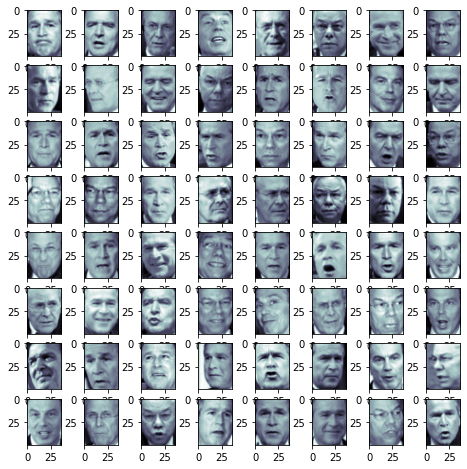

In [15]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i] , cmap = plt.cm.bone)
plt.show()

In [16]:
x = lfw.data
y = lfw.target
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [19]:
pca = PCA()
pca.fit(x_train)

PCA()

In [20]:
pca.components_.shape

(855, 1850)

In [21]:
total = sum(pca.explained_variance_)
k, cur_var = 0, 0
while cur_var/total < 0.99:
    cur_var += pca.explained_variance_[k]
    k += 1
k

316

In [22]:
pca = PCA(n_components=k)
x_transformed = pca.fit_transform(x_train)
x_transformed.shape

(855, 316)

In [23]:
x_approx = pca.inverse_transform(x_transformed)
x_approx.shape

(855, 1850)

In [25]:
x_approx_images = x_approx.reshape((855, 50, 37))
x_approx_images.shape

(855, 50, 37)

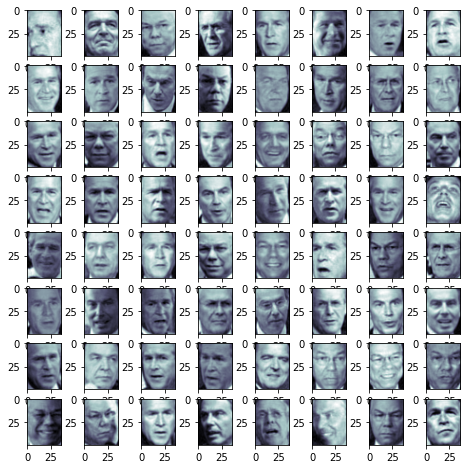

In [26]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i] , cmap = plt.cm.bone)
plt.show()

In [27]:
eigenv = pca.components_
eigenv.shape

(316, 1850)

In [29]:
eigenfaces = eigenv.reshape((316,50,37))
eigenfaces.shape

(316, 50, 37)

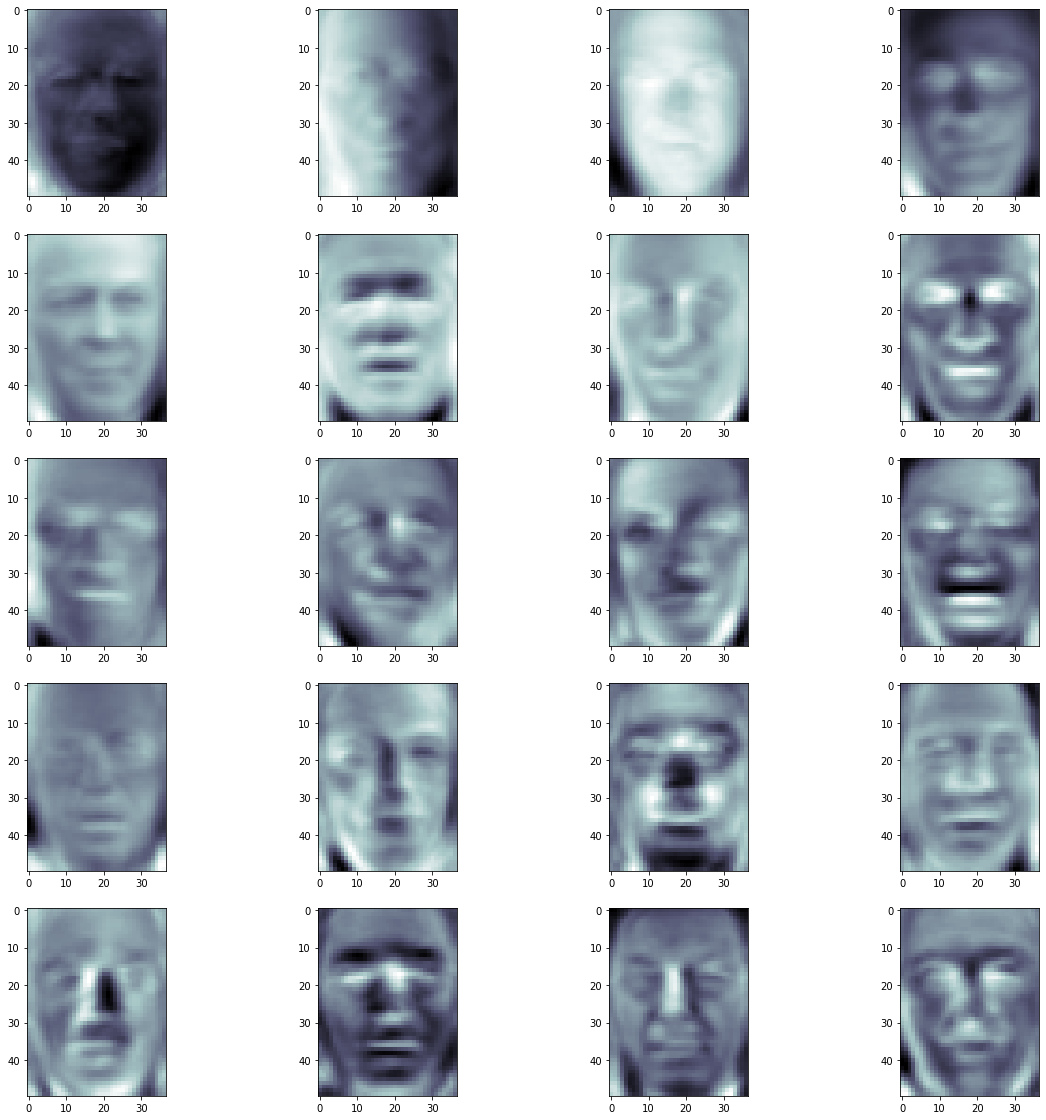

In [30]:
fig = plt.figure(figsize = (20,20))
for i in range(20):
    ax = fig.add_subplot(5,4,i+1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()

In [39]:
clf = RandomForestClassifier()
start = time.time()
clf.fit(x_train, y_train)
end = time.time()
print(end-start)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

4.089632987976074
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        61
           1       0.89      0.22      0.36        36
           2       0.60      0.98      0.74       122
           3       1.00      0.26      0.41        31
           4       0.83      0.29      0.43        35

    accuracy                           0.67       285
   macro avg       0.82      0.50      0.54       285
weighted avg       0.75      0.67      0.62       285



array([[ 45,   0,  16,   0,   0],
       [  7,   8,  21,   0,   0],
       [  3,   0, 119,   0,   0],
       [  1,   1,  19,   8,   2],
       [  2,   0,  23,   0,  10]], dtype=int64)

In [40]:
x_train_pca = x_transformed
x_test_pca = pca.transform(x_test)

In [42]:
import numpy as np
clf = RandomForestClassifier()
start = time.time()
clf.fit(x_train_pca, y_train)
end = time.time()
print(end-start)
y_pred = clf.predict(x_test_pca)
print(classification_report(y_test, y_pred))  # Warning basically shows that 1 or more classes has 0 precision and recall
confusion_matrix(y_test, y_pred)

2.6181375980377197
              precision    recall  f1-score   support

           0       0.68      0.21      0.33        61
           1       0.00      0.00      0.00        36
           2       0.46      0.99      0.63       122
           3       0.00      0.00      0.00        31
           4       1.00      0.03      0.06        35

    accuracy                           0.47       285
   macro avg       0.43      0.25      0.20       285
weighted avg       0.46      0.47      0.34       285



D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 13,   0,  48,   0,   0],
       [  4,   0,  32,   0,   0],
       [  1,   0, 121,   0,   0],
       [  0,   0,  31,   0,   0],
       [  1,   0,  33,   0,   1]], dtype=int64)